# Football Match Analysis

## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing SQLite Data

### Create DB connection

In [2]:
cnx = sqlite3.connect('../data/database.sqlite')

### Store *Match* Table into ```match_df``` variable

In [3]:
match_df = pd.read_sql_query("SELECT * FROM Match", cnx)

In [4]:
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [5]:
match_df.shape

(25979, 115)

In [6]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [7]:
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


## Data Cleaning

In [8]:
match_df_nona = match_df.dropna()

In [9]:
match_df_nona.shape

(1762, 115)

In [10]:
match_df.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
id,1.000000,0.994503,0.994503,0.003970,0.134517,-0.016055,-0.016071,0.008577,0.010525,-0.003447,...,0.033225,0.074725,0.123872,0.055955,0.050887,0.095452,0.025213,0.049139,0.096138,0.023736
country_id,0.994503,1.000000,1.000000,-0.002206,0.038964,-0.021024,-0.021027,0.008059,0.008885,-0.007048,...,0.032409,0.068578,0.108224,0.049525,0.049761,0.088257,0.023217,0.047906,0.088798,0.022099
league_id,0.994503,1.000000,1.000000,-0.002206,0.038964,-0.021024,-0.021027,0.008059,0.008885,-0.007048,...,0.032409,0.068578,0.108224,0.049525,0.049761,0.088257,0.023217,0.047906,0.088798,0.022099
stage,0.003970,-0.002206,-0.002206,1.000000,0.013609,-0.006577,-0.003769,0.015150,0.004961,0.029991,...,0.012186,0.009736,0.036198,0.016772,0.005853,0.032648,0.011585,0.009461,0.034471,0.012731
match_api_id,0.134517,0.038964,0.038964,0.013609,1.000000,0.090613,0.090607,0.004034,0.025996,0.030268,...,-0.007629,0.067762,0.147529,0.045363,0.024919,0.107740,0.016423,0.026972,0.114633,0.013214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBD,0.095452,0.088257,0.088257,0.032648,0.107740,-0.008688,0.008657,0.268241,-0.069312,0.003837,...,0.827845,-0.005970,0.967723,0.838400,-0.041856,1.000000,0.816672,-0.037814,0.980017,0.825114
GBA,0.025213,0.023217,0.023217,0.011585,0.016423,-0.011449,0.025801,0.349588,-0.226642,0.008352,...,0.976786,-0.507240,0.798012,0.968117,-0.539445,0.816672,1.000000,-0.533729,0.818980,0.980309
BSH,0.049139,0.047906,0.047906,0.009461,0.026972,0.018009,-0.011600,-0.254323,0.296190,-0.006354,...,-0.504323,0.984914,-0.032143,-0.486699,0.988317,-0.037814,-0.533729,1.000000,-0.043640,-0.519117
BSD,0.096138,0.088798,0.088798,0.034471,0.114633,-0.006711,0.010704,0.268662,-0.073455,0.004912,...,0.829261,-0.013355,0.968236,0.842956,-0.049098,0.980017,0.818980,-0.043640,1.000000,0.828611


In [11]:
match_df.iloc[3, 55:90]

home_player_1      NaN
home_player_2      NaN
home_player_3      NaN
home_player_4      NaN
home_player_5      NaN
home_player_6      NaN
home_player_7      NaN
home_player_8      NaN
home_player_9      NaN
home_player_10     NaN
home_player_11     NaN
away_player_1      NaN
away_player_2      NaN
away_player_3      NaN
away_player_4      NaN
away_player_5      NaN
away_player_6      NaN
away_player_7      NaN
away_player_8      NaN
away_player_9      NaN
away_player_10     NaN
away_player_11     NaN
goal              None
shoton            None
shotoff           None
foulcommit        None
card              None
cross             None
corner            None
possession        None
B365H             1.44
B365D             3.75
B365A             7.50
BWH               1.40
BWD               4.00
Name: 3, dtype: object

In [12]:
match_df_nona.iloc[3, 20:85]

home_player_X10                                                  4.0
home_player_X11                                                  6.0
away_player_X1                                                   1.0
away_player_X2                                                   2.0
away_player_X3                                                   4.0
                                         ...                        
foulcommit         <foulcommit><value><stats><foulscommitted>1</f...
card               <card><value><comment>y</comment><stats><ycard...
cross              <cross><value><stats><crosses>1</crosses></sta...
corner             <corner><value><stats><corners>1</corners></st...
possession         <possession><value><comment>58</comment><event...
Name: 3251, Length: 65, dtype: object

In [13]:
match_df_nona.loc[3249, "possession"]

'<possession><value><comment>32</comment><event_incident_typefk>352</event_incident_typefk><elapsed>20</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>68</awaypos><homepos>32</homepos><n>44</n><type>special</type><id>2299061</id></value><value><comment>53</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>47</awaypos><homepos>53</homepos><n>114</n><type>special</type><id>2299210</id></value><value><comment>50</comment><event_incident_typefk>352</event_incident_typefk><elapsed>67</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>166</n><type>special</type><id>2299303</id></value><value><comment>44</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>6</sortorder><awaypos>56</awaypos><homepos>44

In [14]:
match_df.columns.tolist()

['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_X1',
 'home_player_X2',
 'home_player_X3',
 'home_player_X4',
 'home_player_X5',
 'home_player_X6',
 'home_player_X7',
 'home_player_X8',
 'home_player_X9',
 'home_player_X10',
 'home_player_X11',
 'away_player_X1',
 'away_player_X2',
 'away_player_X3',
 'away_player_X4',
 'away_player_X5',
 'away_player_X6',
 'away_player_X7',
 'away_player_X8',
 'away_player_X9',
 'away_player_X10',
 'away_player_X11',
 'home_player_Y1',
 'home_player_Y2',
 'home_player_Y3',
 'home_player_Y4',
 'home_player_Y5',
 'home_player_Y6',
 'home_player_Y7',
 'home_player_Y8',
 'home_player_Y9',
 'home_player_Y10',
 'home_player_Y11',
 'away_player_Y1',
 'away_player_Y2',
 'away_player_Y3',
 'away_player_Y4',
 'away_player_Y5',
 'away_player_Y6',
 'away_player_Y7',
 'away_player_Y8',
 'away_player_Y9',
 'away_player_Y10',
 'away_player

In [15]:
relevant_match = match_df[['id',
 'country_id',
 'league_id',
 'season',
 'stage',
 'date',
 'match_api_id',
 'home_team_api_id',
 'away_team_api_id',
 'home_team_goal',
 'away_team_goal',
 'home_player_1',
 'home_player_2',
 'home_player_3',
 'home_player_4',
 'home_player_5',
 'home_player_6',
 'home_player_7',
 'home_player_8',
 'home_player_9',
 'home_player_10',
 'home_player_11',
 'away_player_1',
 'away_player_2',
 'away_player_3',
 'away_player_4',
 'away_player_5',
 'away_player_6',
 'away_player_7',
 'away_player_8',
 'away_player_9',
 'away_player_10',
 'away_player_11',
 'goal',
 'shoton',
 'shotoff',
 'foulcommit',
 'card',
 'cross',
 'corner',
 'possession']]

In [16]:
relevant_match = relevant_match[relevant_match['goal'].notna()]

In [17]:
relevant_match.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
id,1.000000,0.993011,0.993011,0.007779,0.134183,-0.005195,-0.004553,0.029959,0.003744,0.148380,...,0.144401,0.169913,0.203321,0.099167,0.131304,0.150160,0.157078,0.147079,0.162854,0.123093
country_id,0.993011,1.000000,1.000000,0.004347,0.020758,-0.010442,-0.009845,0.032121,0.003218,0.108255,...,0.092490,0.129493,0.159336,0.049854,0.082417,0.105299,0.107786,0.094552,0.112568,0.073580
league_id,0.993011,1.000000,1.000000,0.004347,0.020758,-0.010442,-0.009845,0.032121,0.003218,0.108255,...,0.092490,0.129493,0.159336,0.049854,0.082417,0.105299,0.107786,0.094552,0.112568,0.073580
stage,0.007779,0.004347,0.004347,1.000000,-0.003987,0.005629,0.010018,0.013535,0.010124,0.016336,...,0.030055,0.040513,0.030378,0.025819,0.033483,0.030289,0.035623,0.027551,0.043196,0.034649
match_api_id,0.134183,0.020758,0.020758,-0.003987,1.000000,0.045991,0.047028,-0.011946,0.015535,0.387198,...,0.480890,0.393041,0.421049,0.464910,0.460577,0.430389,0.470859,0.491560,0.473117,0.466457
home_team_api_id,-0.005195,-0.010442,-0.010442,0.005629,0.045991,1.000000,-0.001886,-0.013850,0.004705,0.026352,...,0.011946,-0.000974,0.015426,0.033080,0.008928,0.011731,0.010095,0.016016,0.000927,0.009703
away_team_api_id,-0.004553,-0.009845,-0.009845,0.010018,0.047028,-0.001886,1.000000,0.003921,-0.018407,0.019866,...,-0.004664,0.027391,0.081571,0.066423,0.023967,0.025695,0.015902,0.038274,0.038113,0.041527
home_team_goal,0.029959,0.032121,0.032121,0.013535,-0.011946,-0.013850,0.003921,1.000000,-0.057271,-0.015458,...,0.023496,0.027889,0.022181,0.013281,0.005321,0.018298,0.002707,0.002726,0.026435,0.019376
away_team_goal,0.003744,0.003218,0.003218,0.010124,0.015535,0.004705,-0.018407,-0.057271,1.000000,0.021773,...,-0.013111,-0.011254,-0.012090,-0.010755,0.003334,0.008984,0.007819,0.001986,-0.019181,-0.009942
home_player_1,0.148380,0.108255,0.108255,0.016336,0.387198,0.026352,0.019866,-0.015458,0.021773,1.000000,...,0.226508,0.185267,0.200246,0.221095,0.227765,0.224581,0.224063,0.258750,0.225156,0.225869


In [18]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14217 entries, 1728 to 25948
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14217 non-null  int64  
 1   country_id        14217 non-null  int64  
 2   league_id         14217 non-null  int64  
 3   season            14217 non-null  object 
 4   stage             14217 non-null  int64  
 5   date              14217 non-null  object 
 6   match_api_id      14217 non-null  int64  
 7   home_team_api_id  14217 non-null  int64  
 8   away_team_api_id  14217 non-null  int64  
 9   home_team_goal    14217 non-null  int64  
 10  away_team_goal    14217 non-null  int64  
 11  home_player_1     14185 non-null  float64
 12  home_player_2     14168 non-null  float64
 13  home_player_3     14179 non-null  float64
 14  home_player_4     14175 non-null  float64
 15  home_player_5     14174 non-null  float64
 16  home_player_6     14190 non-null  flo

In [19]:
relevant_match[relevant_match['home_player_10'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14140 entries, 1728 to 25948
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14140 non-null  int64  
 1   country_id        14140 non-null  int64  
 2   league_id         14140 non-null  int64  
 3   season            14140 non-null  object 
 4   stage             14140 non-null  int64  
 5   date              14140 non-null  object 
 6   match_api_id      14140 non-null  int64  
 7   home_team_api_id  14140 non-null  int64  
 8   away_team_api_id  14140 non-null  int64  
 9   home_team_goal    14140 non-null  int64  
 10  away_team_goal    14140 non-null  int64  
 11  home_player_1     14109 non-null  float64
 12  home_player_2     14095 non-null  float64
 13  home_player_3     14103 non-null  float64
 14  home_player_4     14098 non-null  float64
 15  home_player_5     14098 non-null  float64
 16  home_player_6     14114 non-null  flo

In [20]:
relevant_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,34574.0,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,24635.0,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,127857.0,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,33633.0,107216.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...


In [21]:
relevant_match.loc[1728, "possession"]

'<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepos>55</h

In [22]:
relevant_match.loc[1728, "shoton"]

'<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</team><n>253</n><type>shoton</type><id>378828</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>154</event_incident_typefk><elapsed>7</elapsed><subtype>header</subtype><player1>24157</player1><sortorder>2</sortorder><team>10260</team><n>258</n><type>shoton</type><id>378866</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>274</n><type>shoton</type><id>378922</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30373</player1><sortorder>2</sortorder><team>10260</team><n>279</n><type>shoton</ty

In [23]:
relevant_match.loc[1728, "goal"]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>'

In [24]:
relevant_match.loc[1728, "home_team_goal"]

1

In [25]:
relevant_match.loc[1728, "away_team_goal"]

1

In [26]:
draw_0_0 = (relevant_match["home_team_goal"] == 0) & (relevant_match["away_team_goal"] == 0)

In [27]:
relevant_match[draw_0_0].shape

(1089, 41)

In [28]:
relevant_match[draw_0_0].head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1767,1768,1729,1729,2008/2009,12,2008-11-08 00:00:00,489161,8528,10194,0,...,38755.0,23314.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>47</comment><event...
1770,1771,1729,1729,2008/2009,13,2008-11-15 00:00:00,489164,8654,8462,0,...,30830.0,30348.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>47</comment><event...
1778,1779,1729,1729,2008/2009,14,2008-11-22 00:00:00,489172,8650,9879,0,...,31907.0,24741.0,<goal />,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>41</comment><event...
1781,1782,1729,1729,2008/2009,14,2008-11-22 00:00:00,489175,10252,10260,0,...,38817.0,30829.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>39</comment><event...
1787,1788,1729,1729,2008/2009,14,2008-11-22 00:00:00,489181,8455,10261,0,...,37799.0,30619.0,<goal><value><comment>dg</comment><event_incid...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>66</comment><event...
1788,1789,1729,1729,2008/2009,15,2008-12-01 00:00:00,489182,8650,8654,0,...,33781.0,34543.0,<goal />,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>48</comment><event...
1791,1792,1729,1729,2008/2009,15,2008-11-29 00:00:00,489185,10252,9879,0,...,31907.0,24741.0,<goal />,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...
1792,1793,1729,1729,2008/2009,15,2008-11-29 00:00:00,489186,8549,10261,0,...,37799.0,30619.0,<goal><value><comment>dg</comment><event_incid...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>44</comment><event...
1810,1811,1729,1729,2008/2009,17,2008-12-13 00:00:00,489204,8586,10260,0,...,27430.0,38817.0,<goal><value><comment>dg</comment><event_incid...,<sh

In [29]:
relevant_match[draw_0_0].loc[1770, "goal"]

'<goal />'

In [30]:
relevant_match[draw_0_0].loc[1770, "possession"]

'<possession><value><comment>47</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>53</awaypos><homepos>47</homepos><n>68</n><type>special</type><id>487255</id></value><value><comment>50</comment><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>94</n><type>special</type><id>487574</id></value><value><comment>47</comment><event_incident_typefk>352</event_incident_typefk><elapsed>71</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>53</awaypos><homepos>47</homepos><n>161</n><type>special</type><id>488145</id></value><value><comment>50</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>50</awaypos><homepos>50</homepos><n>205</n><type>special<

In [31]:
relevant_match[(relevant_match["home_team_goal"] == 1) & (relevant_match["away_team_goal"] == 0)].head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,25922.0,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...
1743,1744,1729,1729,2008/2009,10,2008-10-29 00:00:00,489137,10194,8472,1,...,23927.0,33418.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><event...
1744,1745,1729,1729,2008/2009,10,2008-10-29 00:00:00,489138,8650,8462,1,...,63520.0,30830.0,<goal><value><comment>p</comment><stats><penal...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>57</comment><event...
1750,1751,1729,1729,2008/2009,11,2008-11-01 00:00:00,489144,8668,9879,1,...,24741.0,31907.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>48</comment><event...
1780,1781,1729,1729,2008/2009,14,2008-11-23 00:00:00,489174,8586,8655,1,...,34947.0,30646.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>47</comment><event...


In [32]:
relevant_match[(relevant_match["home_team_goal"] == 1) & (relevant_match["away_team_goal"] == 0)].loc[1729, "goal"]

'<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>4</elapsed><player2>39297</player2><subtype>shot</subtype><player1>26181</player1><sortorder>2</sortorder><team>9825</team><id>375546</id><n>231</n><type>goal</type><goal_type>n</goal_type></value></goal>'

In [33]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14217 entries, 1728 to 25948
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14217 non-null  int64  
 1   country_id        14217 non-null  int64  
 2   league_id         14217 non-null  int64  
 3   season            14217 non-null  object 
 4   stage             14217 non-null  int64  
 5   date              14217 non-null  object 
 6   match_api_id      14217 non-null  int64  
 7   home_team_api_id  14217 non-null  int64  
 8   away_team_api_id  14217 non-null  int64  
 9   home_team_goal    14217 non-null  int64  
 10  away_team_goal    14217 non-null  int64  
 11  home_player_1     14185 non-null  float64
 12  home_player_2     14168 non-null  float64
 13  home_player_3     14179 non-null  float64
 14  home_player_4     14175 non-null  float64
 15  home_player_5     14174 non-null  float64
 16  home_player_6     14190 non-null  flo

In [34]:
relevant_match["score"] = pd.Series()

for ix, row in relevant_match.iterrows():
    if row["home_team_goal"] > row["away_team_goal"]:
        relevant_match.loc[ix, "score"] = int(0) ## O is home victory
    elif row["home_team_goal"] < row["away_team_goal"]:
        relevant_match.loc[ix, "score"] = int(2) ## 2 is away victory
    else:
        relevant_match.loc[ix, "score"] = int(1) ## 1 is a draw

/home/olivier/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [35]:
relevant_match["score"]

1728     1.0
1729     0.0
1730     2.0
1731     0.0
1732     0.0
        ... 
25944    2.0
25945    0.0
25946    1.0
25947    2.0
25948    0.0
Name: score, Length: 14217, dtype: float64

In [36]:
relevant_match.loc[[1728, 1729], ["id", "home_team_goal", "away_team_goal", "score"]].head()

,id,home_team_goal,away_team_goal,score
1728,1729,1,1,1.0
1729,1730,1,0,0.0


In [37]:
relevant_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,score
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.0
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,0.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,2.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,0.0
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,...,107216.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>51</comment><event...,0.0


In [38]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14217 entries, 1728 to 25948
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14217 non-null  int64  
 1   country_id        14217 non-null  int64  
 2   league_id         14217 non-null  int64  
 3   season            14217 non-null  object 
 4   stage             14217 non-null  int64  
 5   date              14217 non-null  object 
 6   match_api_id      14217 non-null  int64  
 7   home_team_api_id  14217 non-null  int64  
 8   away_team_api_id  14217 non-null  int64  
 9   home_team_goal    14217 non-null  int64  
 10  away_team_goal    14217 non-null  int64  
 11  home_player_1     14185 non-null  float64
 12  home_player_2     14168 non-null  float64
 13  home_player_3     14179 non-null  float64
 14  home_player_4     14175 non-null  float64
 15  home_player_5     14174 non-null  float64
 16  home_player_6     14190 non-null  flo

In [39]:
key_home = "home_player_"
key_away = "away_player_"
for i in range(1,12):
    relevant_match = relevant_match[relevant_match[key_home+str(i)].notna()]
    relevant_match = relevant_match[relevant_match[key_away+str(i)].notna()]



In [40]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 1728 to 25948
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13325 non-null  int64  
 1   country_id        13325 non-null  int64  
 2   league_id         13325 non-null  int64  
 3   season            13325 non-null  object 
 4   stage             13325 non-null  int64  
 5   date              13325 non-null  object 
 6   match_api_id      13325 non-null  int64  
 7   home_team_api_id  13325 non-null  int64  
 8   away_team_api_id  13325 non-null  int64  
 9   home_team_goal    13325 non-null  int64  
 10  away_team_goal    13325 non-null  int64  
 11  home_player_1     13325 non-null  float64
 12  home_player_2     13325 non-null  float64
 13  home_player_3     13325 non-null  float64
 14  home_player_4     13325 non-null  float64
 15  home_player_5     13325 non-null  float64
 16  home_player_6     13325 non-null  flo

In [41]:
relevant_match.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score
id,1.000000,0.993221,0.993221,0.006101,0.162325,-0.006725,-0.005993,0.028239,0.006925,0.159608,...,0.173672,0.209056,0.105455,0.141294,0.158553,0.165830,0.153649,0.173413,0.128519,-0.009796
country_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
league_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
stage,0.006101,0.002253,0.002253,1.000000,0.000595,-0.010515,0.010148,0.010729,0.008261,0.020247,...,0.042046,0.027421,0.026769,0.036980,0.032052,0.039392,0.030589,0.042307,0.038007,-0.002238
match_api_id,0.162325,0.051229,0.051229,0.000595,1.000000,0.035369,0.038671,-0.014596,0.014743,0.382646,...,0.388931,0.411994,0.459030,0.452768,0.426025,0.466500,0.483728,0.466945,0.458454,0.031614
home_team_api_id,-0.006725,-0.010625,-0.010625,-0.010515,0.035369,1.000000,-0.001906,-0.016002,0.001327,0.013741,...,-0.004947,0.016587,0.028323,0.007132,0.008959,0.003762,0.010197,0.000196,-0.000668,0.018388
away_team_api_id,-0.005993,-0.010357,-0.010357,0.010148,0.038671,-0.001906,1.000000,0.002777,-0.020205,0.014209,...,0.027127,0.071638,0.059217,0.022422,0.023362,0.017015,0.029156,0.029193,0.026429,-0.007933
home_team_goal,0.028239,0.030745,0.030745,0.010729,-0.014596,-0.016002,0.002777,1.000000,-0.056359,-0.015185,...,0.026327,0.019400,0.014606,0.002573,0.017895,0.000729,0.003051,0.026602,0.019773,-0.621503
away_team_goal,0.006925,0.006667,0.006667,0.008261,0.014743,0.001327,-0.020205,-0.056359,1.000000,0.019859,...,-0.009743,-0.013398,-0.011998,0.003078,0.010065,0.010038,0.001814,-0.018533,-0.008619,0.628280
home_player_1,0.159608,0.121060,0.121060,0.020247,0.382646,0.013741,0.014209,-0.015185,0.019859,1.000000,...,0.178890,0.195419,0.217143,0.223215,0.223336,0.223498,0.250452,0.218850,0.221134,0.029372


In [42]:
relevant_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
       'possession', 'score'],
      dtype='object')

In [43]:
relevant_match[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'score']].corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score
id,1.000000,0.993221,0.993221,0.006101,0.162325,-0.006725,-0.005993,0.028239,0.006925,0.159608,...,0.173672,0.209056,0.105455,0.141294,0.158553,0.165830,0.153649,0.173413,0.128519,-0.009796
country_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
league_id,0.993221,1.000000,1.000000,0.002253,0.051229,-0.010625,-0.010357,0.030745,0.006667,0.121060,...,0.134781,0.167569,0.057969,0.094499,0.115364,0.118386,0.103158,0.125191,0.080914,-0.013151
stage,0.006101,0.002253,0.002253,1.000000,0.000595,-0.010515,0.010148,0.010729,0.008261,0.020247,...,0.042046,0.027421,0.026769,0.036980,0.032052,0.039392,0.030589,0.042307,0.038007,-0.002238
match_api_id,0.162325,0.051229,0.051229,0.000595,1.000000,0.035369,0.038671,-0.014596,0.014743,0.382646,...,0.388931,0.411994,0.459030,0.452768,0.426025,0.466500,0.483728,0.466945,0.458454,0.031614
home_team_api_id,-0.006725,-0.010625,-0.010625,-0.010515,0.035369,1.000000,-0.001906,-0.016002,0.001327,0.013741,...,-0.004947,0.016587,0.028323,0.007132,0.008959,0.003762,0.010197,0.000196,-0.000668,0.018388
away_team_api_id,-0.005993,-0.010357,-0.010357,0.010148,0.038671,-0.001906,1.000000,0.002777,-0.020205,0.014209,...,0.027127,0.071638,0.059217,0.022422,0.023362,0.017015,0.029156,0.029193,0.026429,-0.007933
home_team_goal,0.028239,0.030745,0.030745,0.010729,-0.014596,-0.016002,0.002777,1.000000,-0.056359,-0.015185,...,0.026327,0.019400,0.014606,0.002573,0.017895,0.000729,0.003051,0.026602,0.019773,-0.621503
away_team_goal,0.006925,0.006667,0.006667,0.008261,0.014743,0.001327,-0.020205,-0.056359,1.000000,0.019859,...,-0.009743,-0.013398,-0.011998,0.003078,0.010065,0.010038,0.001814,-0.018533,-0.008619,0.628280
home_player_1,0.159608,0.121060,0.121060,0.020247,0.382646,0.013741,0.014209,-0.015185,0.019859,1.000000,...,0.178890,0.195419,0.217143,0.223215,0.223336,0.223498,0.250452,0.218850,0.221134,0.029372


In [44]:
relevant_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,score
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,37799.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.0
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,...,27267.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,0.0
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,30853.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,2.0
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,34466.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,0.0
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,30646.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...,2.0


In [45]:
relevant_match.loc[1733, "possession"]

'<possession><value><comment>46</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>5</sortorder><awaypos>54</awaypos><homepos>46</homepos><n>70</n><type>special</type><id>376438</id></value><value><comment>59</comment><elapsed_plus>3</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>41</awaypos><homepos>59</homepos><n>120</n><type>special</type><id>376819</id></value><value><comment>51</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>49</awaypos><homepos>51</homepos><n>177</n><type>special</type><id>377333</id></value><value><comment>51</comment><elapsed_plus>6</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>49</awaypos><homepos>51</h

In [46]:
type(relevant_match.loc[1733, "possession"])

str

In [47]:
a = relevant_match.loc[1733, "possession"][relevant_match.loc[1733, "possession"].rfind("<awaypos>")+len("<awaypos>"):relevant_match.loc[1733, "possession"].rfind("</awaypos>")]
a

'49'

In [48]:
possession_match_df = relevant_match.copy()

In [49]:
possession_match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 1728 to 25948
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13325 non-null  int64  
 1   country_id        13325 non-null  int64  
 2   league_id         13325 non-null  int64  
 3   season            13325 non-null  object 
 4   stage             13325 non-null  int64  
 5   date              13325 non-null  object 
 6   match_api_id      13325 non-null  int64  
 7   home_team_api_id  13325 non-null  int64  
 8   away_team_api_id  13325 non-null  int64  
 9   home_team_goal    13325 non-null  int64  
 10  away_team_goal    13325 non-null  int64  
 11  home_player_1     13325 non-null  float64
 12  home_player_2     13325 non-null  float64
 13  home_player_3     13325 non-null  float64
 14  home_player_4     13325 non-null  float64
 15  home_player_5     13325 non-null  float64
 16  home_player_6     13325 non-null  flo

In [50]:
## Send to this function the "Possession" Series in order to extract the final possession of the Game.

def home_possession(s):
    return int(s[s.rfind("<homepos>")+len("<homepos>"):s.rfind("</homepos>")])/100

def away_possession(s):
    return int(s[s.rfind("<awaypos>")+len("<awaypos>"):s.rfind("</awaypos>")])/100
    

In [51]:
home_possession("'<possession><value><comment>46</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>5</sortorder><awaypos>54</awaypos><homepos>46</homepos><n>70</n><type>special</type><id>376438</id></value><value><comment>59</comment><elapsed_plus>3</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>41</awaypos><homepos>59</homepos><n>120</n><type>special</type><id>376819</id></value><value><comment>51</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>49</awaypos><homepos>51</homepos><n>177</n><type>special</type><id>377333</id></value><value><comment>51</comment><elapsed_plus>6</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>49</awaypos><homepos>51</homepos><n>227</n><type>special</type><id>377673</id></value></possession>'")

0.51

In [52]:
relevant_match["possession"].tail()

25944    <possession />
25945    <possession />
25946    <possession />
25947    <possession />
25948    <possession />
Name: possession, dtype: object

In [53]:
relevant_match["possession"].nunique()

7931

In [54]:
relevant_match = relevant_match[(relevant_match["possession"] != "<possession />")]

In [55]:
relevant_match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7930 entries, 1728 to 24556
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7930 non-null   int64  
 1   country_id        7930 non-null   int64  
 2   league_id         7930 non-null   int64  
 3   season            7930 non-null   object 
 4   stage             7930 non-null   int64  
 5   date              7930 non-null   object 
 6   match_api_id      7930 non-null   int64  
 7   home_team_api_id  7930 non-null   int64  
 8   away_team_api_id  7930 non-null   int64  
 9   home_team_goal    7930 non-null   int64  
 10  away_team_goal    7930 non-null   int64  
 11  home_player_1     7930 non-null   float64
 12  home_player_2     7930 non-null   float64
 13  home_player_3     7930 non-null   float64
 14  home_player_4     7930 non-null   float64
 15  home_player_5     7930 non-null   float64
 16  home_player_6     7930 non-null   floa

In [56]:
relevant_match["home_poss"] = relevant_match["possession"].apply(home_possession)
relevant_match["away_poss"] = relevant_match["possession"].apply(away_possession)

In [57]:
relevant_match["home_poss"]

1728     0.55
1729     0.66
1730     0.46
1731     0.52
1733     0.51
         ... 
24552    0.49
24553    0.50
24554    0.52
24555    0.45
24556    0.62
Name: home_poss, Length: 7930, dtype: float64

In [58]:
relevant_match["away_poss"]

1728     0.45
1729     0.34
1730     0.54
1731     0.48
1733     0.49
         ... 
24552    0.51
24553    0.50
24554    0.48
24555    0.55
24556    0.38
Name: away_poss, Length: 7930, dtype: float64

In [59]:
relevant_match.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,score,home_poss,away_poss
id,1.000000,0.992199,0.992199,-0.004737,0.213325,0.009980,0.012053,0.024755,0.017295,0.203838,...,0.138926,0.195531,0.188262,0.209922,0.223639,0.222528,0.172126,-0.001367,-0.004716,0.004716
country_id,0.992199,1.000000,1.000000,-0.007853,0.093156,0.004055,0.005718,0.029422,0.017522,0.160769,...,0.084819,0.143163,0.139952,0.156744,0.168456,0.168011,0.118185,-0.005517,-0.004455,0.004455
league_id,0.992199,1.000000,1.000000,-0.007853,0.093156,0.004055,0.005718,0.029422,0.017522,0.160769,...,0.084819,0.143163,0.139952,0.156744,0.168456,0.168011,0.118185,-0.005517,-0.004455,0.004455
stage,-0.004737,-0.007853,-0.007853,1.000000,-0.010480,-0.022027,0.001911,0.023876,0.012766,0.019028,...,0.000347,0.011867,0.017511,0.022586,0.018110,0.028083,0.020371,-0.012895,-0.005484,0.005484
match_api_id,0.213325,0.093156,0.093156,-0.010480,1.000000,0.050466,0.053786,-0.034838,0.003331,0.394245,...,0.482655,0.474503,0.437537,0.478568,0.501946,0.489002,0.479325,0.033570,-0.002658,0.002658
home_team_api_id,0.009980,0.004055,0.004055,-0.022027,0.050466,1.000000,-0.002575,-0.015044,0.003580,0.026398,...,0.040858,0.014029,0.013682,0.008388,0.019631,0.002123,0.001451,0.016770,-0.057799,0.057799
away_team_api_id,0.012053,0.005718,0.005718,0.001911,0.053786,-0.002575,1.000000,-0.001220,-0.019361,0.022265,...,0.078954,0.033315,0.027804,0.026774,0.042738,0.040750,0.039719,-0.007274,0.047549,-0.047549
home_team_goal,0.024755,0.029422,0.029422,0.023876,-0.034838,-0.015044,-0.001220,1.000000,-0.069619,-0.025455,...,0.004255,-0.015040,0.004080,-0.005250,-0.003952,0.012056,0.015904,-0.621968,0.189213,-0.189213
away_team_goal,0.017295,0.017522,0.017522,0.012766,0.003331,0.003580,-0.019361,-0.069619,1.000000,0.013915,...,-0.013987,-0.004194,0.012041,-0.004366,-0.012360,-0.028221,-0.017576,0.629720,-0.150233,0.150233
home_player_1,0.203838,0.160769,0.160769,0.019028,0.394245,0.026398,0.022265,-0.025455,0.013915,1.000000,...,0.236157,0.250740,0.241318,0.246956,0.272055,0.241128,0.241306,0.031047,-0.023314,0.023314


In [60]:
np.unique(relevant_match["foulcommit"] == "<foulcommit>")

array([False])

In [61]:
relevant_match.loc[1728, "foulcommit"]

'<foulcommit><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>1</elapsed><player2>32569</player2><player1>25518</player1><sortorder>1</sortorder><team>10261</team><n>267</n><type>foulcommit</type><id>378824</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>2</elapsed><player2>24157</player2><player1>30929</player1><sortorder>0</sortorder><team>10261</team><n>277</n><type>foulcommit</type><id>378826</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>3</elapsed><player2>24148</player2><player1>29581</player1><sortorder>1</sortorder><team>10261</team><n>254</n><type>foulcommit</type><id>378830</id></value><value><stats><foulscommitted>1</foulscommitted></stats><event_incident_typefk>37</event_incident_typefk><elapsed>5</elapsed><player2>40565</player2><player1>30373</player1><

In [62]:
relevant_match.loc[1728,:]

id                                                               1729
country_id                                                       1729
league_id                                                        1729
season                                                      2008/2009
stage                                                               1
date                                              2008-08-17 00:00:00
match_api_id                                                   489042
home_team_api_id                                                10260
away_team_api_id                                                10261
home_team_goal                                                      1
away_team_goal                                                      1
home_player_1                                                30726.00
home_player_2                                                30362.00
home_player_3                                                30620.00
home_player_4       

In [63]:
team_df = pd.read_sql_query("SELECT * FROM Team", cnx)

In [64]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [65]:
team_df[(team_df["team_api_id"] == 10260) | (team_df["team_api_id"] == 10261)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN
26,3458,10261,13.0,Newcastle United,NEW


In [66]:
relevant_match.loc[1728, "possession"]

'<possession><value><comment>56</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>44</awaypos><homepos>56</homepos><n>68</n><type>special</type><id>379029</id></value><value><comment>54</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>117</n><type>special</type><id>379251</id></value><value><comment>54</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>46</awaypos><homepos>54</homepos><n>190</n><type>special</type><id>379443</id></value><value><comment>55</comment><elapsed_plus>5</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>45</awaypos><homepos>55</h

In [67]:
relevant_match.loc[1728, "corner"]

'<corner><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>19</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>0</sortorder><team>10261</team><n>280</n><type>corner</type><id>378960</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>330</event_incident_typefk><elapsed>22</elapsed><subtype>short</subtype><player1>40565</player1><sortorder>0</sortorder><team>10261</team><n>263</n><type>corner</type><id>378992</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>22</elapsed><subtype>cross</subtype><player1>38807</player1><sortorder>4</sortorder><team>10261</team><n>293</n><type>corner</type><id>378996</id></value><value><stats><corners>1</corners></stats><event_incident_typefk>329</event_incident_typefk><elapsed>48</elapsed><subtype>cross</subtype><player1>24154</player1><sortorder>2</sortorder><team>10260</team><n>300</n><type>corner<

In [68]:
relevant_match.loc[1728, "shoton"]

'<shoton><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>3</elapsed><subtype>blocked_shot</subtype><player1>24154</player1><sortorder>0</sortorder><team>10260</team><n>253</n><type>shoton</type><id>378828</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>154</event_incident_typefk><elapsed>7</elapsed><subtype>header</subtype><player1>24157</player1><sortorder>2</sortorder><team>10260</team><n>258</n><type>shoton</type><id>378866</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30829</player1><sortorder>1</sortorder><team>10260</team><n>274</n><type>shoton</type><id>378922</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>153</event_incident_typefk><elapsed>14</elapsed><subtype>shot</subtype><player1>30373</player1><sortorder>2</sortorder><team>10260</team><n>279</n><type>shoton</ty

In [69]:
relevant_match.loc[1728, "corner"].count("<corners>")
relevant_match.loc[1728, "home_team_api_id"]
relevant_match.loc[1728, "away_team_api_id"]

10261

In [70]:
relevant_match.loc[1728, "corner"].count(str(relevant_match.loc[1728, "home_team_api_id"]))

6

In [71]:
relevant_match.loc[1728, "corner"].count(str(relevant_match.loc[1728, "away_team_api_id"]))

6

In [72]:
print(relevant_match.loc[1728, "shoton"].count(str(relevant_match.loc[1728, "away_team_api_id"])))
print(relevant_match.loc[1728, "shotoff"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

1
9


In [73]:
print(relevant_match.loc[1728, "shoton"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "shotoff"].count(str(relevant_match.loc[1728, "home_team_api_id"])))

11
10


In [74]:
print(relevant_match.loc[1728, "foulcommit"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "foulcommit"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

16
11


In [75]:
print(relevant_match.loc[1728, "card"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "card"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

3
0


In [76]:
print(relevant_match.loc[1728, "cross"].count(str(relevant_match.loc[1728, "home_team_api_id"])))
print(relevant_match.loc[1728, "cross"].count(str(relevant_match.loc[1728, "away_team_api_id"])))

24
9


In [77]:
(relevant_match['shoton'] == '<shoton />').unique()

array([False])

In [78]:
(possession_match_df["possession"] != "<possession />").sum()

7930

In [79]:
relevant_match['shoton'].tail()

24552    <shoton><value><stats><shoton>1</shoton></stat...
24553    <shoton><value><event_incident_typefk>876</eve...
24554    <shoton><value><stats><blocked>1</blocked></st...
24555    <shoton><value><stats><shoton>1</shoton></stat...
24556    <shoton><value><stats><blocked>1</blocked></st...
Name: shoton, dtype: object

In [80]:
possession_match_df.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,score
25944,25945,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992225,9931,9956,0,...,289472.0,<goal><value><comment>o</comment><stats><owngo...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,2.0
25945,25946,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992226,7896,10190,3,...,35831.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0.0
25946,25947,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992227,10199,10179,2,...,38601.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,1.0
25947,25948,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992228,10191,10192,0,...,37554.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,2.0
25948,25949,24558,24558,2015/2016,36,2016-05-25 00:00:00,1992229,10243,9824,3,...,493418.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,0.0


In [81]:
print(f"Shoton empty : {(relevant_match['shoton'] == '<shoton />').sum()}")
print(f"Shotoff emtpy : {(relevant_match['shotoff'] == '<shotoff />').sum()}")
print(f"Foulcommit empty : {(relevant_match['foulcommit'] == '<foulcommit />').sum()}")
print(f"Card empty: {(relevant_match['card']  == '<card />').sum()}")
print(f"Cross emtpy : {(relevant_match['cross']  == '<cross />').sum()}")
print(f"Corners emtpy : {(relevant_match['corner']  == '<corner />').sum()}")
print(f"Possession emtpy : {(relevant_match['possession']  == '<possession />').sum()}")

Shoton empty : 0
Shotoff emtpy : 0
Foulcommit empty : 0
Card empty: 280
Cross emtpy : 0
Corners emtpy : 1
Possession emtpy : 0


In [82]:
relevant_match = relevant_match[relevant_match["card"] != "<card />"]

In [83]:
relevant_match = relevant_match[relevant_match["corner"] != "<corner />"]

In [84]:
relevant_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shoton,shotoff,foulcommit,card,cross,corner,possession,score,home_poss,away_poss
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,1.0,0.55,0.45
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,2.0,0.46,0.54
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,0.0,0.52,0.48
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...,2.0,0.51,0.49
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><event...,0.0,0.53,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><stats...,0.0,0.49,0.51
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,<shoton><value><event_incident_typefk>876</eve...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>53</comment><stats...,0.0,0.50,0.50
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>49</comment><stats...,0.0,0.52,0.48
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit>

## Data Analysis

In [85]:
attributes_list = ['shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner']

In [86]:
final_df = relevant_match.copy()

In [87]:
for attribute in attributes_list:
    final_df["home_"+attribute] = pd.Series()
    final_df["away_"+attribute] = pd.Series()
    for ix, row in final_df.iterrows():
        final_df.loc[ix, "home_"+attribute] = int(final_df.loc[ix, attribute].count(str(final_df.loc[ix, "home_team_api_id"])))
        final_df.loc[ix, "away_"+attribute] = int(final_df.loc[ix, attribute].count(str(final_df.loc[ix, "away_team_api_id"])))

/home/olivier/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/home/olivier/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
final_df["score"] = final_df["score"].apply(lambda x: int(x))
final_df["home_shoton"] = final_df["home_shoton"].apply(lambda x: int(x))
final_df["away_shoton"] = final_df["away_shoton"].apply(lambda x: int(x))
final_df["home_shotoff"] = final_df["home_shotoff"].apply(lambda x: int(x))
final_df["away_shotoff"] = final_df["away_shotoff"].apply(lambda x: int(x))
final_df["home_foulcommit"] = final_df["home_foulcommit"].apply(lambda x: int(x))
final_df["away_foulcommit"] = final_df["away_foulcommit"].apply(lambda x: int(x))
final_df["home_card"] = final_df["home_card"].apply(lambda x: int(x))
final_df["away_card"] = final_df["away_card"].apply(lambda x: int(x))
final_df["home_cross"] = final_df["home_cross"].apply(lambda x: int(x))
final_df["away_cross"] = final_df["away_cross"].apply(lambda x: int(x))
final_df["home_corner"] = final_df["home_corner"].apply(lambda x: int(x))
final_df["away_corner"] = final_df["away_corner"].apply(lambda x: int(x))

In [89]:
final_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10,9,16,11,3,0,24,9,6,6
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,3,5,13,12,0,2,15,19,1,8
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,7,15,14,13,2,1,15,27,6,10
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,7,8,11,11,2,2,14,21,3,4
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,5,5,11,11,1,2,25,27,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,5,4,26,10,4,4,13,9,9,2
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3,5,11,10,0,1,20,14,3,5
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,12,5,8,15,1,3,20,20,9,3
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,6,0,8,11,3,3,17,6,3,3


In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 1728 to 24556
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7649 non-null   int64  
 1   country_id        7649 non-null   int64  
 2   league_id         7649 non-null   int64  
 3   season            7649 non-null   object 
 4   stage             7649 non-null   int64  
 5   date              7649 non-null   object 
 6   match_api_id      7649 non-null   int64  
 7   home_team_api_id  7649 non-null   int64  
 8   away_team_api_id  7649 non-null   int64  
 9   home_team_goal    7649 non-null   int64  
 10  away_team_goal    7649 non-null   int64  
 11  home_player_1     7649 non-null   float64
 12  home_player_2     7649 non-null   float64
 13  home_player_3     7649 non-null   float64
 14  home_player_4     7649 non-null   float64
 15  home_player_5     7649 non-null   float64
 16  home_player_6     7649 non-null   floa

In [91]:
final_df.corr()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
id,1.000000,0.992251,0.992251,-0.001177,0.207314,0.009648,0.011856,0.025839,0.017834,0.200813,...,-0.067115,-0.054681,0.221227,0.157384,0.301703,0.272149,-0.115405,-0.114233,-0.020806,-0.043216
country_id,0.992251,1.000000,1.000000,-0.004338,0.087405,0.003645,0.005466,0.030746,0.018223,0.157910,...,-0.056293,-0.046380,0.224209,0.158214,0.299098,0.274771,-0.106015,-0.107862,-0.016272,-0.041522
league_id,0.992251,1.000000,1.000000,-0.004338,0.087405,0.003645,0.005466,0.030746,0.018223,0.157910,...,-0.056293,-0.046380,0.224209,0.158214,0.299098,0.274771,-0.106015,-0.107862,-0.016272,-0.041522
stage,-0.001177,-0.004338,-0.004338,1.000000,-0.008710,-0.022212,0.002117,0.026812,0.014125,0.019834,...,-0.010395,-0.021924,-0.046593,-0.064911,0.007222,-0.018452,0.004147,-0.013268,0.017097,0.000203
match_api_id,0.207314,0.087405,0.087405,-0.008710,1.000000,0.051250,0.054494,-0.037131,0.002217,0.392933,...,-0.104722,-0.077409,0.043124,0.058060,0.054738,0.007800,-0.107756,-0.080270,-0.048494,-0.026569
home_team_api_id,0.009648,0.003645,0.003645,-0.022212,0.051250,1.000000,-0.002617,-0.015255,0.003663,0.026528,...,-0.020549,0.019708,0.019895,0.016997,0.013740,-0.008776,-0.024445,0.017285,-0.024756,0.015617
away_team_api_id,0.011856,0.005466,0.005466,0.002117,0.054494,-0.002617,1.000000,-0.001326,-0.019809,0.022431,...,-0.001567,-0.007355,0.013390,0.022891,0.015381,0.015133,-0.007746,-0.025769,0.003109,0.005034
home_team_goal,0.025839,0.030746,0.030746,0.026812,-0.037131,-0.015255,-0.001326,1.000000,-0.061929,-0.026896,...,0.013145,-0.095073,-0.099252,-0.042388,-0.134475,0.025443,-0.091975,-0.033657,0.017139,-0.063813
away_team_goal,0.017834,0.018223,0.018223,0.014125,0.002217,0.003663,-0.019809,-0.061929,1.000000,0.014580,...,-0.052319,0.023775,0.016632,-0.042498,0.129655,-0.063008,0.031341,-0.052620,-0.038657,0.031422
home_player_1,0.200813,0.157910,0.157910,0.019834,0.392933,0.026528,0.022431,-0.026896,0.014580,1.000000,...,-0.063409,-0.022464,0.092016,0.093431,0.052548,0.033729,-0.065046,-0.040566,-0.015693,-0.004426


In [92]:
final_df.info(), final_df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 1728 to 24556
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7649 non-null   int64  
 1   country_id        7649 non-null   int64  
 2   league_id         7649 non-null   int64  
 3   season            7649 non-null   object 
 4   stage             7649 non-null   int64  
 5   date              7649 non-null   object 
 6   match_api_id      7649 non-null   int64  
 7   home_team_api_id  7649 non-null   int64  
 8   away_team_api_id  7649 non-null   int64  
 9   home_team_goal    7649 non-null   int64  
 10  away_team_goal    7649 non-null   int64  
 11  home_player_1     7649 non-null   float64
 12  home_player_2     7649 non-null   float64
 13  home_player_3     7649 non-null   float64
 14  home_player_4     7649 non-null   float64
 15  home_player_5     7649 non-null   float64
 16  home_player_6     7649 non-null   floa

(None,
 Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
        'match_api_id', 'home_team_api_id', 'away_team_api_id',
        'home_team_goal', 'away_team_goal', 'home_player_1', 'home_player_2',
        'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
        'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
        'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
        'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
        'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
        'goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner',
        'possession', 'score', 'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner'],
       dtype='object'))

In [93]:
final_df[['score', 'home_player_1', 'home_player_2',
        'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
        'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
        'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
        'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
        'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11', 'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']]

,score,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,1,30726.0,30362.0,30620.0,30865.0,32569.0,24148.0,34944.0,30373.0,24154.0,...,10,9,16,11,3,0,24,9,6,6
1730,2,32562.0,38836.0,24446.0,24408.0,36786.0,38802.0,24655.0,17866.0,30352.0,...,3,5,13,12,0,2,15,19,1,8
1731,0,36374.0,30966.0,23818.0,37277.0,30687.0,36394.0,37169.0,24223.0,24773.0,...,7,15,14,13,2,1,15,27,6,10
1733,2,31465.0,30371.0,24004.0,33086.0,30857.0,24011.0,109058.0,23268.0,24846.0,...,7,8,11,11,2,2,14,21,3,4
1734,0,35442.0,24166.0,24167.0,38899.0,24161.0,24753.0,97932.0,24393.0,30892.0,...,5,5,11,11,1,2,25,27,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,0,177126.0,38424.0,474589.0,56678.0,41167.0,33635.0,30871.0,184533.0,354467.0,...,5,4,26,10,4,4,13,9,9,2
24553,0,25563.0,104382.0,477471.0,41707.0,38842.0,39198.0,238841.0,261599.0,37450.0,...,3,5,11,10,0,1,20,14,3,5
24554,0,33764.0,181297.0,159881.0,411617.0,154938.0,182224.0,33871.0,45749.0,604105.0,...,12,5,8,15,1,3,20,20,9,3
24555,1,104986.0,261609.0,108572.0,2752.0,239350.0,2805.0,170667.0,80492.0,534484.0,...,6,0,8,11,3,3,17,6,3,3


In [94]:
final_df[['score', 'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']].corr()

,score,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
score,1.000000,-0.146454,0.146454,-0.052196,0.074206,-0.012360,0.052777,0.058184,-0.013369,0.146626,-0.054850,0.124940,-0.087032,-0.006262,0.028894
home_poss,-0.146454,1.000000,-1.000000,0.369733,-0.348238,0.342726,-0.325501,-0.168866,0.080735,-0.165794,0.103133,0.343948,-0.370865,0.392069,-0.338008
away_poss,0.146454,-1.000000,1.000000,-0.369733,0.348238,-0.342726,0.325501,0.168866,-0.080735,0.165794,-0.103133,-0.343948,0.370865,-0.392069,0.338008
home_shoton,-0.052196,0.369733,-0.369733,1.000000,-0.130868,0.305753,-0.187683,-0.122943,-0.031341,-0.111494,0.015220,0.349981,-0.187237,0.433737,-0.182353
away_shoton,0.074206,-0.348238,0.348238,-0.130868,1.000000,-0.173789,0.285601,0.035325,-0.076245,0.065046,-0.085561,-0.161940,0.345142,-0.200879,0.402949
home_shotoff,-0.012360,0.342726,-0.342726,0.305753,-0.173789,1.000000,-0.149966,-0.135169,-0.007283,-0.126066,0.042025,0.371017,-0.202381,0.382976,-0.185936
away_shotoff,0.052777,-0.325501,0.325501,-0.187683,0.285601,-0.149966,1.000000,0.033292,-0.081018,0.063891,-0.104732,-0.177725,0.362243,-0.204862,0.355461
home_foulcommit,0.058184,-0.168866,0.168866,-0.122943,0.035325,-0.135169,0.033292,1.000000,0.267246,0.384678,0.117774,-0.099300,0.011083,-0.130582,-0.013989
away_foulcommit,-0.013369,0.080735,-0.080735,-0.031341,-0.076245,-0.007283,-0.081018,0.267246,1.000000,0.085231,0.366281,-0.032224,-0.060876,-0.045374,-0.067078
home_card,0.146626,-0.165794,0.165794,-0.111494,0.065046,-0.126066,0.063891,0.384678,0.085231,1.000000,0.212537,-0.083809,0.018681,-0.084674,0.050868


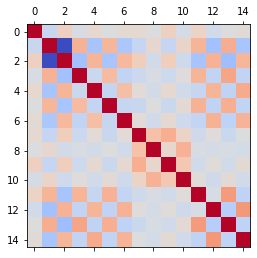

In [95]:
plt.matshow(final_df[['score', 'home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']].corr(), cmap='coolwarm')
plt.show()

In [96]:
final_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,...,10,9,16,11,3,0,24,9,6,6
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,...,3,5,13,12,0,2,15,19,1,8
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,...,7,15,14,13,2,1,15,27,6,10
1733,1734,1729,1729,2008/2009,1,2008-08-16 00:00:00,489047,8668,8655,2,...,7,8,11,11,2,2,14,21,3,4
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,2,...,5,5,11,11,1,2,25,27,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24552,24553,21518,21518,2015/2016,9,2015-10-25 00:00:00,2030167,9906,10267,2,...,5,4,26,10,4,4,13,9,9,2
24553,24554,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030168,9864,9783,2,...,3,5,11,10,0,1,20,14,3,5
24554,24555,21518,21518,2015/2016,9,2015-10-26 00:00:00,2030169,8315,9869,3,...,12,5,8,15,1,3,20,20,9,3
24555,24556,21518,21518,2015/2016,9,2015-10-24 00:00:00,2030170,7878,8603,1,...,6,0,8,11,3,3,17,6,3,3


## Data Modeling

### Baseline model

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X = final_df[['home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']]
y = final_df['score']

In [99]:
X.head()

,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1728,0.55,0.45,11,1,10,9,16,11,3,0,24,9,6,6
1730,0.46,0.54,4,11,3,5,13,12,0,2,15,19,1,8
1731,0.52,0.48,5,7,7,15,14,13,2,1,15,27,6,10
1733,0.51,0.49,2,8,7,8,11,11,2,2,14,21,3,4
1734,0.53,0.47,7,2,5,5,11,11,1,2,25,27,7,9


In [100]:
y

1728     1
1730     2
1731     0
1733     2
1734     0
        ..
24552    0
24553    0
24554    0
24555    1
24556    0
Name: score, Length: 7649, dtype: int64

In [159]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Instanciate Robust Scaler
r_scaler = RobustScaler()
mm_scaler = MinMaxScaler()

# Fit scaler to feature
r_scaler.fit(X)

# Scale
X = r_scaler.transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [103]:
X_train.shape

(5354, 14)

In [104]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5354, 14), (5354,), (2295, 14), (2295,))

## Supervised Machine Learning  : KNN Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=40) ## ==> K = 10 neighbors
kneigh.fit(X_train, y_train)  ## => Require X_train, y_train from Hold Out method
kneigh.score(X_test,y_test)  ## => Require X_test, y_test from Hold Out method

0.5028322440087146

In [106]:
# kneigh.predict(new_X) ## => new_X : vector of feature to predict

Example :

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.55 | 0.45 | 7 | 2 | 14 | 9 | 16 | 11 | 3 | 3 | 10 | 8 | 6 | 6

In [107]:
kneigh.predict(r_scaler.transform([[0.55,0.45,7,2,14,9,16,11,3,3,10,8,6,6]]))

array([0])

## Deep Learning Approach (ANN MultiClass)

In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [109]:
y.value_counts(), np.unique(y)

(0    3507
 2    2202
 1    1940
 Name: score, dtype: int64,
 array([0, 1, 2]))

In [110]:
from tensorflow.keras.utils import to_categorical

# YOUR CODE HERE
print(y)
y_cat = to_categorical(y, dtype='int64')
print(y_cat)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

1728     1
1730     2
1731     0
1733     2
1734     0
        ..
24552    0
24553    0
24554    0
24555    1
24556    0
Name: score, Length: 7649, dtype: int64
[[0 1 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [111]:
#Init model

from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Dense(5, activation='relu', input_dim=14)) # put the dimensions of X.shape for x1,x2,x3 
model.add(layers.Dense(2, activation='relu')) # ReLU activation is the prefered default activation fonction
model.add(layers.Dense(3, activation='softmax')) # Number of neurones correspond to the number of categorical values to classify

In [112]:
#Compile model
model.compile(loss='categorical_crossentropy',   # The loss is calculated with the categorical_crossentropy parameter
              optimizer='adamax',
              metrics=['accuracy'])

In [113]:
y_train.shape, y_test.shape

((5354, 3), (2295, 3))

In [114]:
#Fit model
from tensorflow.keras.callbacks import EarlyStopping                  ## import EarlyStopping if wanted to stop before all the epochs iterations.
es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)  ## define the number of patience (retries before stopping the iteration epohcs) 


model.fit(X_train,                ## doing the fit on the train data
          y_train,                ## doing the fit on the train data
          validation_split=0.3,   ## Validation set (here split the 30% of the train data)
          epochs=500,             ## Number of epochs to iterate (the EarlyStopping should stop before arriving at the end if find optimum acu)
          batch_size=32,          ## Number of batch size. Slice the data to adjust weights
          callbacks = [es])       ## Calling EarlyStopping

Epoch 1/500
118/118 [==============================] - 1s 7ms/step - loss: 1.1208 - accuracy: 0.3574 - val_loss: 1.1052 - val_accuracy: 0.4126
Epoch 2/500
118/118 [==============================] - 0s 1ms/step - loss: 1.1018 - accuracy: 0.4136 - val_loss: 1.0928 - val_accuracy: 0.4269
Epoch 3/500
118/118 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.4371 - val_loss: 1.0847 - val_accuracy: 0.4362
Epoch 4/500
118/118 [==============================] - 0s 1ms/step - loss: 1.0846 - accuracy: 0.4456 - val_loss: 1.0791 - val_accuracy: 0.4474
Epoch 5/500
118/118 [==============================] - 0s 4ms/step - loss: 1.0814 - accuracy: 0.4405 - val_loss: 1.0752 - val_accuracy: 0.4555
Epoch 6/500
118/118 [==============================] - 0s 1ms/step - loss: 1.0775 - accuracy: 0.4437 - val_loss: 1.0721 - val_accuracy: 0.4574
Epoch 7/500
118/118 [==============================] - 0s 1ms/step - loss: 1.0708 - accuracy: 0.4590 - val_loss: 1.0696 - val_accuracy: 0.4580

In [115]:
#Evaluate the model
model.evaluate(X_test, y_test, verbose=1)  ## Evaluate the model with the test set

72/72 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.5028


[1.0001475811004639, 0.5028322339057922]

Example: **Braga - Maritimo (2021/01/07) Half-Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.57 | 0.43 | 1 | 1 | 5 | 3 | 10 | 4 | 1 | 1 | 2 | 2 | 3 | 2

In [116]:
model.predict(r_scaler.transform([[0.57,0.43,1,1,5,3,10,4,1,1,2,2,3,2]]))

array([[0.71114075, 0.19346572, 0.09539342]], dtype=float32)

Example : **Saint-Etienne - PSG (2021/01/06) Full Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.32 | 0.68 | 5 | 5 | 5 | 4 | 13 | 12 | 1 | 1 | 8 | 12 | 9 | 10

In [119]:
model.predict(r_scaler.transform([[0.32,0.68,5,5,5,4,13,12,1,1,8,12,9,10]]))

array([[0.31899247, 0.28815976, 0.39284772]], dtype=float32)

Example : **Southampton - Liverpool (2021/01/04) Full Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.33 | 0.67 | 3 | 1 | 3 | 11 | 5 | 12 | 1 | 3 | 4 | 8 | 1 | 10

In [120]:
model.predict(r_scaler.transform([[0.33,0.67,3,1,3,11,5,12,1,3,4,8,1,10]]))

array([[0.26924208, 0.28989434, 0.4408636 ]], dtype=float32)

Example : **Chelsea - Man City (2021/01/03) Full Time**

h_poss | a_poss | h_shoton | a_shoton | h_shotoff | a_shotoff | h_foulcommit | a_foulcommit | h_card | a_card | h_cross | a_cross | h_corner | a_corner
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
0.55 | 0.45 | 2 | 6 | 2 | 8 | 11 | 10 | 3 | 1 | 4 | 8 | 5 | 3

In [142]:
model.predict(r_scaler.transform([[0.55,0.45,2,6,2,8,11,10,3,1,3,5,5,3]]))

array([[0.4521955 , 0.27551687, 0.27228773]], dtype=float32)

In [251]:
final_df[["score","match_api_id","home_team_goal","away_team_goal"]+features][(final_df["home_team_goal"] > 4) & (final_df["home_shoton"] < 1)]

,score,match_api_id,home_team_goal,away_team_goal,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
8627,0,857352,5,1,0.38,0.62,0,2,1,5,16,12,1,1,15,15,3,2


In [207]:
final_df[["score","match_api_id","home_team_goal","away_team_goal"]+features][final_df["match_api_id"] == 489210]


,score,match_api_id,home_team_goal,away_team_goal,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
1816,0,489210,3,0,0.04,0.96,1,4,6,7,9,15,1,1,21,28,7,8


In [204]:
final_df.loc[1816, "shoton"]

'<shoton><value><stats><shoton>1</shoton></stats><event_incident_typefk>136</event_incident_typefk><elapsed>9</elapsed><subtype>header</subtype><player1>127857</player1><sortorder>1</sortorder><team>8528</team><n>229</n><type>shoton</type><id>526608</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>137</event_incident_typefk><elapsed>25</elapsed><subtype>distance</subtype><player1>23170</player1><sortorder>1</sortorder><team>8655</team><n>255</n><type>shoton</type><id>526860</id></value><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>29</elapsed><subtype>blocked_shot</subtype><player1>30842</player1><sortorder>0</sortorder><team>8655</team><n>258</n><type>shoton</type><id>526920</id></value><value><stats><blocked>1</blocked></stats><event_incident_typefk>61</event_incident_typefk><elapsed>42</elapsed><subtype>blocked_shot</subtype><player1>30842</player1><sortorder>1</sortorder><team>8655</team><n>273</n><type

In [206]:
team_df[(team_df["team_api_id"] == 8528) | (team_df["team_api_id"] == 8655)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
32,3464,8528,1917.0,Wigan Athletic,WIG
36,3468,8655,3.0,Blackburn Rovers,BLB


In [235]:
init = match_df.loc[1816, "possession"]
init

'<possession><value><comment>66</comment><event_incident_typefk>352</event_incident_typefk><elapsed>25</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>34</awaypos><homepos>66</homepos><n>67</n><type>special</type><id>526856</id></value><value><comment>60</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>40</awaypos><homepos>60</homepos><n>123</n><type>special</type><id>527219</id></value><value><comment>60</comment><event_incident_typefk>352</event_incident_typefk><elapsed>70</elapsed><subtype>possession</subtype><sortorder>1</sortorder><awaypos>40</awaypos><homepos>60</homepos><n>172</n><type>special</type><id>527722</id></value><value><comment>4</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>90</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>96</awaypos><homepos>4</hom

In [224]:
a = match_df.loc[1816, "possession"][match_df.loc[1816, "possession"].find("<awaypos>"):match_df.loc[1816, "possession"].find("</homepos>")+len("</homepos>")]
a

'<awaypos>34</awaypos><homepos>66</homepos>'

In [225]:
init = init[init.find("</homepos>")+len("</homepos>"):]

In [226]:
b = init[init.find("<awaypos>"):init.find("</homepos>")+len("</homepos>")]
b

'<awaypos>40</awaypos><homepos>60</homepos>'

In [228]:
init = init[init.find("</homepos>")+len("</homepos>"):]
c = init[init.find("<awaypos>"):init.find("</homepos>")+len("</homepos>")]
init = init[init.find("</homepos>")+len("</homepos>"):]
d = init[init.find("<awaypos>"):init.find("</homepos>")+len("</homepos>")]

In [229]:
c, d

('<awaypos>40</awaypos><homepos>60</homepos>',
 '<awaypos>96</awaypos><homepos>4</homepos>')

In [230]:
init = init[init.find("</homepos>")+len("</homepos>"):]

In [270]:
(66+60+60+4)/4, (34+40+40+96)/4

(47.5, 52.5)

In [242]:
25/90

0.2777777777777778

In [252]:
final_df.loc[8627, ["score","match_api_id","home_team_goal","away_team_goal"]+features]

score                   0
match_api_id       857352
home_team_goal          5
away_team_goal          1
home_poss            0.38
away_poss            0.62
home_shoton             0
away_shoton             2
home_shotoff            1
away_shotoff            5
home_foulcommit        16
away_foulcommit        12
home_card               1
away_card               1
home_cross             15
away_cross             15
home_corner             3
away_corner             2
Name: 8627, dtype: object

In [253]:
match_df.loc[8627, "shoton"]

'<shoton><value><stats><shoton>1</shoton></stats><event_incident_typefk>137</event_incident_typefk><elapsed>70</elapsed><subtype>distance</subtype><player1>73448</player1><sortorder>0</sortorder><team>8178</team><n>214</n><type>shoton</type><id>1509466</id></value><value><stats><shoton>1</shoton></stats><event_incident_typefk>137</event_incident_typefk><elapsed>77</elapsed><subtype>distance</subtype><player1>31199</player1><sortorder>0</sortorder><team>8178</team><n>222</n><type>shoton</type><id>1509503</id></value></shoton>'

In [268]:
match_df.loc[8627, "possession"]

'<possession><value><comment>45</comment><event_incident_typefk>352</event_incident_typefk><elapsed>16</elapsed><subtype>possession</subtype><sortorder>2</sortorder><awaypos>55</awaypos><homepos>45</homepos><n>30</n><type>special</type><id>1508762</id></value><value><comment>43</comment><event_incident_typefk>352</event_incident_typefk><elapsed>37</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>57</awaypos><homepos>43</homepos><n>65</n><type>special</type><id>1508878</id></value><value><comment>40</comment><elapsed_plus>1</elapsed_plus><event_incident_typefk>352</event_incident_typefk><elapsed>45</elapsed><subtype>possession</subtype><sortorder>4</sortorder><awaypos>60</awaypos><homepos>40</homepos><n>94</n><type>special</type><id>1509011</id></value><value><comment>38</comment><event_incident_typefk>352</event_incident_typefk><elapsed>65</elapsed><subtype>possession</subtype><sortorder>0</sortorder><awaypos>62</awaypos><homepos>38</homepos><n>50</n><type>special

In [269]:
(45+43+40+38+38)/5

40.8

In [258]:
final_df[["score","match_api_id","home_team_goal","away_team_goal"]+features][final_df["match_api_id"] == 857352]

,score,match_api_id,home_team_goal,away_team_goal,home_poss,away_poss,home_shoton,away_shoton,home_shotoff,away_shotoff,home_foulcommit,away_foulcommit,home_card,away_card,home_cross,away_cross,home_corner,away_corner
8627,0,857352,5,1,0.38,0.62,0,2,1,5,16,12,1,1,15,15,3,2


In [260]:
team_df[(team_df["team_api_id"] == final_df.loc[8627, "home_team_api_id"]) | (team_df["team_api_id"] == final_df.loc[8627, "away_team_api_id"])]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
94,15617,9823,21.0,FC Bayern Munich,BMU
96,15619,8178,32.0,Bayer 04 Leverkusen,LEV


In [267]:
final_df.loc[8627, :]

id                                                               8628
country_id                                                       7809
league_id                                                        7809
season                                                      2010/2011
stage                                                              30
date                                              2011-04-17 00:00:00
match_api_id                                                   857352
home_team_api_id                                                 9823
away_team_api_id                                                 8178
home_team_goal                                                      5
away_team_goal                                                      1
home_player_1                                                32653.00
home_player_2                                                30894.00
home_player_3                                                33085.00
home_player_4       

In [176]:
model.predict(r_scaler.transform([final_df.loc[1728, features]]))

array([[0.42292866, 0.27377427, 0.30329713]], dtype=float32)

In [182]:
model.predict(r_scaler.transform([final_df.loc[1730, features]]))

array([[0.42292866, 0.27377427, 0.30329713]], dtype=float32)

In [ ]:
model.predict(r_scaler.transform([final_df.loc[1730, features]]))

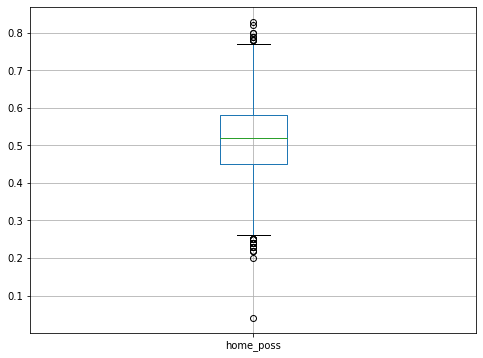

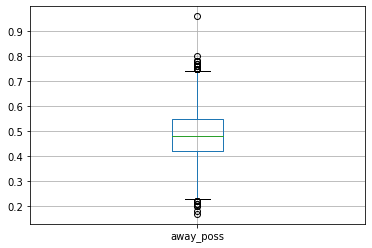

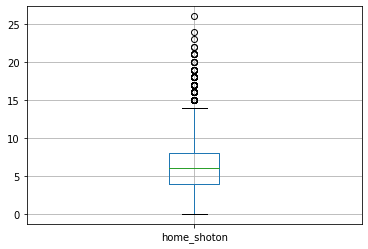

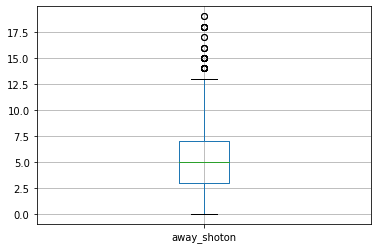

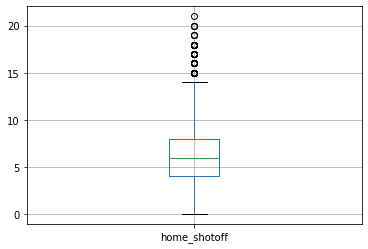

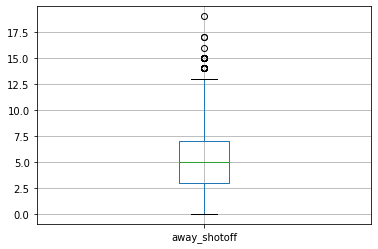

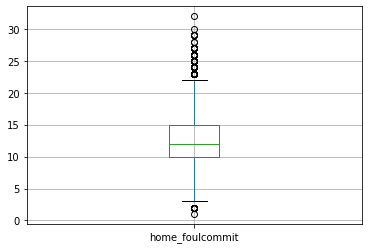

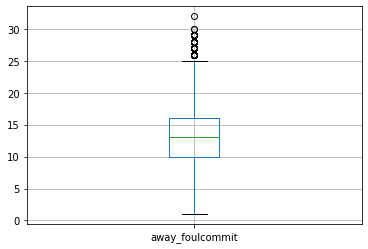

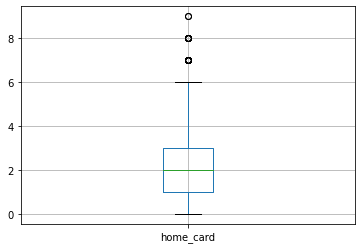

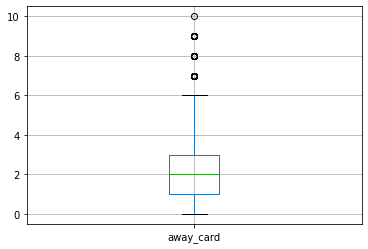

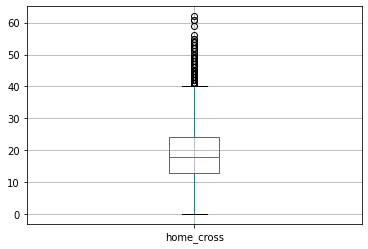

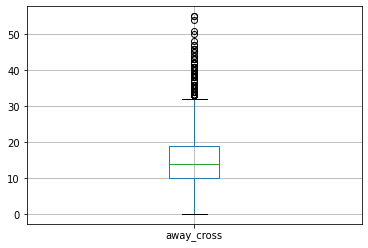

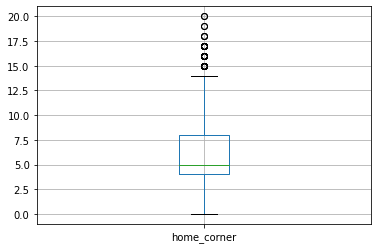

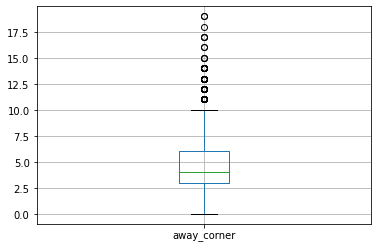

In [158]:
features = ['home_poss', 'away_poss', 'home_shoton',
        'away_shoton', 'home_shotoff', 'away_shotoff', 'home_foulcommit',
        'away_foulcommit', 'home_card', 'away_card', 'home_cross', 'away_cross',
        'home_corner', 'away_corner']

target = 'score'

plt.figure(figsize=(8,6))

for feature in features:
    final_df[[feature]].boxplot()
    plt.show()

In [160]:
from sklearn.preprocessing import MinMaxScaler

# Instanciate Robust Scaler
mm_scaler = MinMaxScaler()

# Fit scaler to feature
mm_scaler.fit(X)

# Scale
X = mm_scaler.transform(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [162]:
#Init model

from tensorflow.keras import Sequential, layers

model2 = Sequential()
model2.add(layers.Dense(5, activation='relu', input_dim=14)) # put the dimensions of X.shape for x1,x2,x3 
model2.add(layers.Dense(2, activation='relu')) # ReLU activation is the prefered default activation fonction
model2.add(layers.Dense(3, activation='softmax')) # Number of neurones correspond to the number of categorical values to classify

In [163]:
#Compile model
model2.compile(loss='categorical_crossentropy',   # The loss is calculated with the categorical_crossentropy parameter
              optimizer='adamax',
              metrics=['accuracy'])

In [164]:
#Fit model
from tensorflow.keras.callbacks import EarlyStopping                  ## import EarlyStopping if wanted to stop before all the epochs iterations.
es = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)  ## define the number of patience (retries before stopping the iteration epohcs) 



model2.fit(X_train,                ## doing the fit on the train data
          y_train,                ## doing the fit on the train data
          validation_split=0.3,   ## Validation set (here split the 30% of the train data)
          epochs=500,             ## Number of epochs to iterate (the EarlyStopping should stop before arriving at the end if find optimum acu)
          batch_size=32,          ## Number of batch size. Slice the data to adjust weights
          callbacks = [es])       ## Calling EarlyStopping
          
       


Epoch 1/500
118/118 [==============================] - 1s 5ms/step - loss: 1.0966 - accuracy: 0.4408 - val_loss: 1.0901 - val_accuracy: 0.4630
Epoch 2/500
118/118 [==============================] - 0s 3ms/step - loss: 1.0889 - accuracy: 0.4591 - val_loss: 1.0836 - val_accuracy: 0.4630
Epoch 3/500
118/118 [==============================] - 0s 2ms/step - loss: 1.0844 - accuracy: 0.4483 - val_loss: 1.0785 - val_accuracy: 0.4630
Epoch 4/500
118/118 [==============================] - 0s 3ms/step - loss: 1.0794 - accuracy: 0.4534 - val_loss: 1.0752 - val_accuracy: 0.4630
Epoch 5/500
118/118 [==============================] - 1s 10ms/step - loss: 1.0759 - accuracy: 0.4557 - val_loss: 1.0724 - val_accuracy: 0.4630
Epoch 6/500
118/118 [==============================] - 1s 4ms/step - loss: 1.0767 - accuracy: 0.4432 - val_loss: 1.0701 - val_accuracy: 0.4630
Epoch 7/500
118/118 [==============================] - 0s 3ms/step - loss: 1.0771 - accuracy: 0.4391 - val_loss: 1.0682 - val_accuracy: 0.463

In [165]:
#Evaluate the model
model2.evaluate(X_test, y_test, verbose=1)  ## Evaluate the model with the test set


72/72 [==============================] - 0s 973us/step - loss: 0.9947 - accuracy: 0.5181


[0.9946549534797668, 0.5180827975273132]

In [168]:
model2.predict(mm_scaler.transform([[0.57,0.43,1,1,5,3,10,4,1,1,2,2,3,2]]))

array([[0.40912724, 0.27767348, 0.31319934]], dtype=float32)

In [169]:
model2.predict(mm_scaler.transform([[0.32,0.68,5,5,5,4,13,12,1,1,8,12,9,10]]))

array([[0.6446102 , 0.22577812, 0.12961169]], dtype=float32)